**Sri Vishnu Vardhan Kavili**

**https://colab.research.google.com/drive/1oNfFqUzG6A8ge1F7W2D8zzyPgyvR1NoE?usp=sharing**

Useful references and sources:

https://www.kaggle.com/c/cifar-10

https://keras.io/examples/vision/metric_learning/

https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer


# **Part 1 - Designing and using our own CNN model**

#### **Part 1.1: Setup**

##### **Import Needed Resources / Libraries**

In [ ]:
from __future__ import print_function
from tensorflow import keras
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

import random

import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay

##### **Load and prepare the data**

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train_actual_label = y_train.flatten()
y_test_actual_label = y_test.flatten()

# Normalize the image data
x_train = x_train.astype("float32") / 255.0
y_train = np.squeeze(y_train)
x_test = x_test.astype("float32") / 255.0
y_test = np.squeeze(y_test)

170498071/170498071 [==============================] - 13s 0us/step


#### **Part 1.2: Examine Data**

In [ ]:
# Number of samples
print("Number of training sample: ",y_train.shape[0])
print("Number of test samples: ", y_test.shape[0])

Number of training sample:  50000
Number of test samples:  10000


In [ ]:
# Number of classes

# The num_classes variables is just a way of specifying custom count of the columns that we
# later pass in as an argument when we are trying to test the accuracy between true and
# predicted values
num_classes = max(y_test)+1
print(num_classes)

10


In [ ]:
# Shape of image data
# Ex: (50000, 32, 32, 3) is equal to (Batch Size, Height, Width, Number of channels)
# Batch size -  How many data points are we allowed to pass in, as one set
# Height and Width of the image
# Number of channels - Each channel has a composition, A gene, which will help us identify the composition of the current pixel we are

# So, each filter, filters based on the composition of the channel. For example, one kernel, filters
# based on the Red color. The other kernel, filters based on the Blue color. Then the other kernel, filters based on the Green color.
# Each pixel of the image is considered as the channel. By that I mean, each pixel has idividual composition to it, which we call as a
# channel.
# Now, each of that pixel is filtered by all the available kernels, until all the pixels are done filtering.
# Multiple kernels will operate simultaneously on the input image. Each kernel performs its filtering operation on the entire image
# independently and in parallel.
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


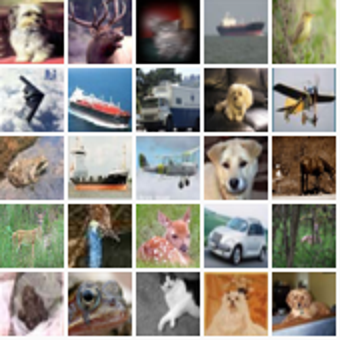

In [ ]:
# Showing collage of 25 (randomly selected) images

height_width = 32

# Examples are just a set of single data point and it's label
def show_collage(examples):
    box_size = height_width + 2
    num_rows, num_cols = examples.shape[:2]

    collage = Image.new(
        mode="RGB",
        size=(num_cols * box_size, num_rows * box_size),
        color=(250, 250, 250),
    )
    for row_idx in range(num_rows):
        for col_idx in range(num_cols):
            array = (np.array(examples[row_idx, col_idx]) * 255).astype(np.uint8)
            collage.paste(
                Image.fromarray(array), (col_idx * box_size, row_idx * box_size)
            )

    # Double size for better visualisation.
    collage = collage.resize((2 * num_cols * box_size, 2 * num_rows * box_size))
    return collage


# Show a collage of 5x5 random images.
sample_idxs = np.random.randint(0, 50000, size=(5, 5))
examples = x_train[sample_idxs]
show_collage(examples)

In [ ]:
idx = y_train[0]
print(idx)

6


In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
labels[idx]

'Frog'

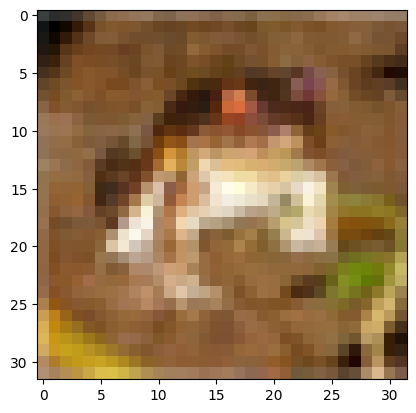

In [ ]:
plt.imshow(x_train[0])
plt.show()

In [ ]:
# Convert class vectors to binary class matrices.
# This is called one-hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

#### **Part 1.3: Design and configure model** *(CNN)*

In this part we will use a convolutional neural network (CNN) built from scratch.


In [ ]:
batch_size = 128
epochs = 10
data_augmentation = False

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## **Part 1.4: Train the model**

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
391/391 [==============================] - 15s 16ms/step - loss: 1.9840 - accuracy: 0.2738 - val_loss: 1.7533 - val_accuracy: 0.3893
Epoch 2/10
391/391 [==============================] - 5s 13ms/step - loss: 1.6924 - accuracy: 0.3882 - val_loss: 1.6102 - val_accuracy: 0.4254
Epoch 3/10
391/391 [==============================] - 5s 13ms/step - loss: 1.5637 - accuracy: 0.4321 - val_loss: 1.4569 - val_accuracy: 0.4769
Epoch 4/10
391/391 [==============================] - 5s 13ms/step - loss: 1.4739 - accuracy: 0.4660 - val_loss: 1.3654 - val_accuracy: 0.5138
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 1.4085 - accuracy: 0.4946 - val_loss: 1.3457 - val_accuracy: 0.5209
Epoch 6/10
391/391 [==============================] - 6s 16ms/step - loss: 1.3474 - accuracy: 0.5207 - val_loss: 1.2814 - val_accuracy: 0.5495
Epoch 7/10
391/391 [==============================] - 6s 15ms/step - loss: 1.2959 - accuracy: 0.5409 - val_loss: 1.2128 - val_accuracy: 0.570

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


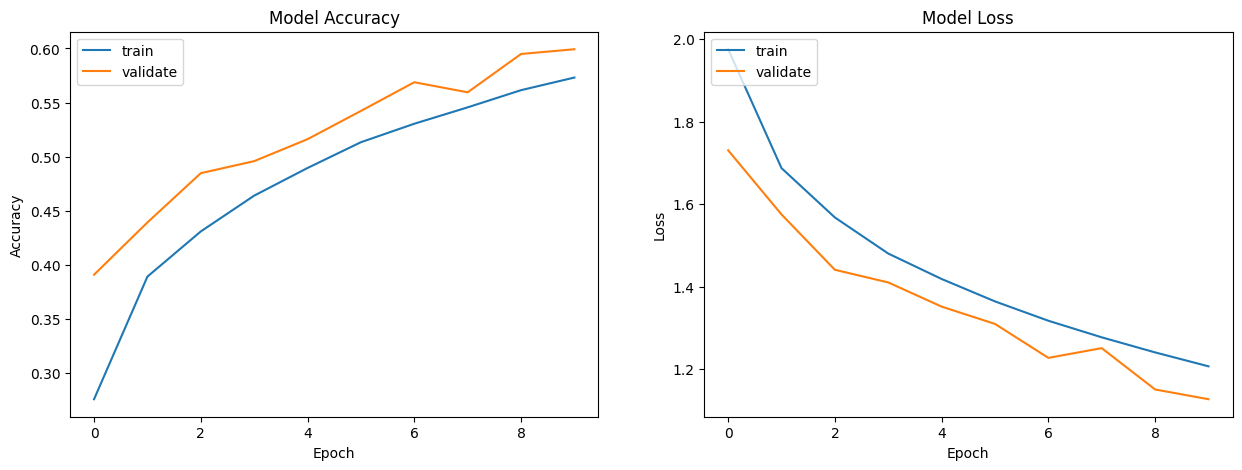

In [ ]:
plotmodelhistory(history)

## **Part 1.5: Evaluate the model**

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1266 - accuracy: 0.5993
Test loss: 1.126638412475586
Test accuracy: 0.5993000268936157
313/313 [==============================] - 1s 2ms/step


In [ ]:
# The heatmap() function is just used to get the "styling" and "labeling" and stuf like that, to get the heatmap ready
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    return im, cbar


# The annote_heatmap function is responsible to add the information to the styled heatmap which happened in the above fucntion
def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # text is the information or data inside each cell.
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center", color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

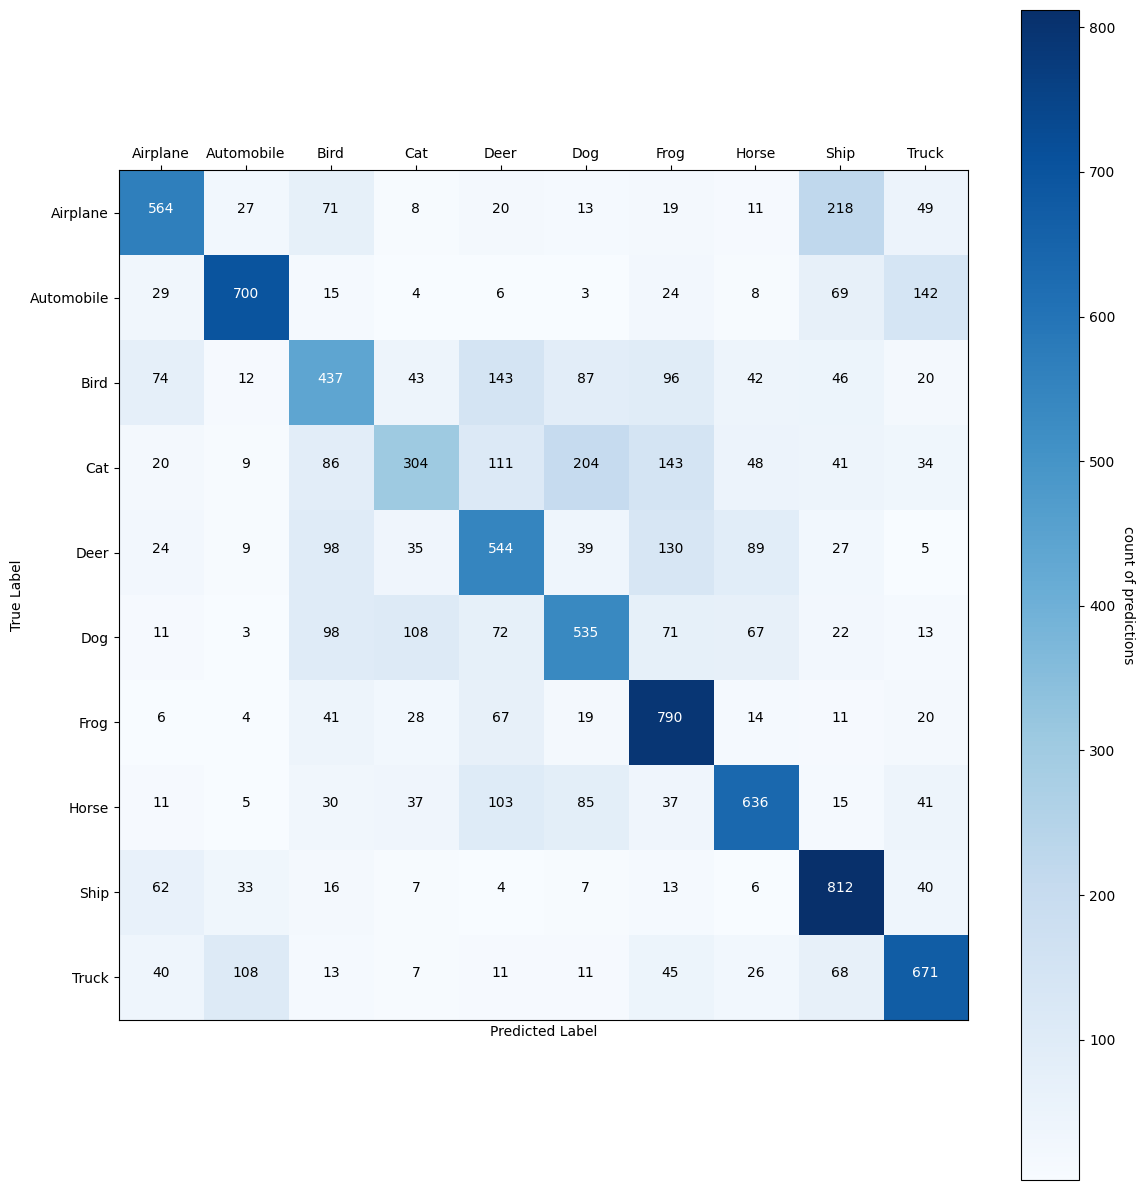

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1000
           1       0.77      0.70      0.73      1000
           2       0.48      0.44      0.46      1000
           3       0.52      0.30      0.38      1000
           4       0.50      0.54      0.52      1000
           5       0.53      0.54      0.53      1000
           6       0.58      0.79      0.67      1000
           7       0.67      0.64      0.65      1000
           8       0.61      0.81      0.70      1000
           9       0.65      0.67      0.66      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000



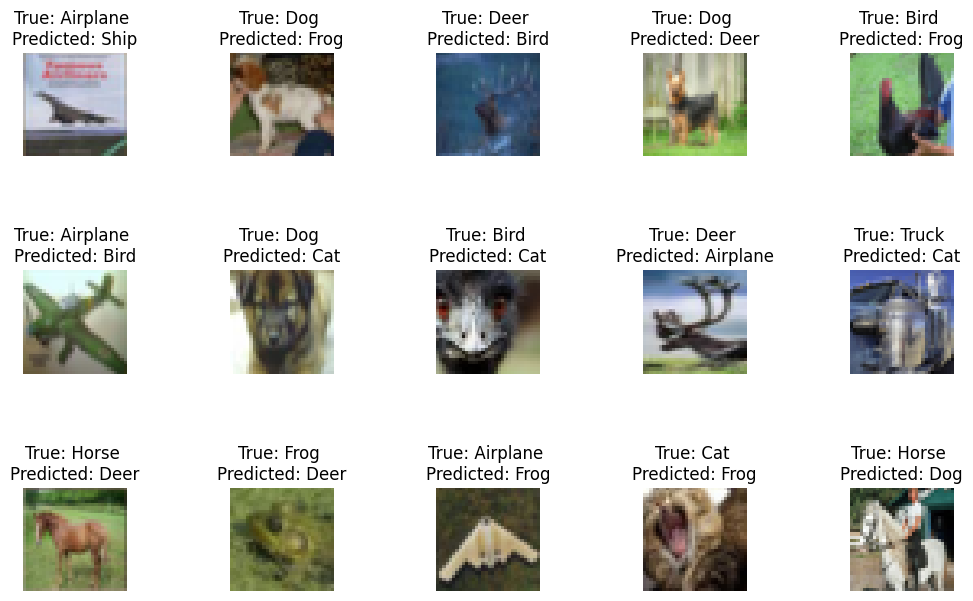

In [ ]:
# In this cell, we just see what all did our model fail in, with the prediction.

# Inspect errors
R = 3 # Rows
C = 5 # Columns
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel() # We use "ravel" to convert multi-dimensional to one-dimentional array, as it will be easy for us to iterate through
# the given array

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]],
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    predict_x=model.predict(test_image)
    test_result=np.argmax(predict_x,axis=1)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

1/1 [==============================] - 0s 151ms/step


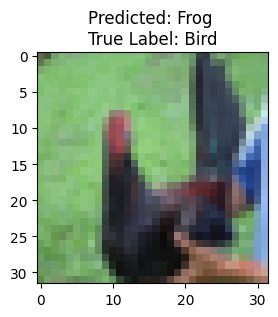

In [ ]:
show_test(25)

## **PART 1** - **Now we will use different answer various questions with respect to the above model**

### **Conclusion on Part 1 - Tasks:**

 &emsp;**1.1.1** Is the dataset balanced?

 &emsp;**1.1.2** Does your model suffer from overfitting? If so, what would you suggest doing about it?

 &emsp;**1.1.3** Is accuracy a good metric of success in this case? Why (not)?

  &emsp;**1.1.4** What is the baseline accuracy for this dataset/problem?

 a) Writing code to try different combinations of:

 - numbers of hidden layers and units per layer

 - loss functions

 - activation functions

 **1.1.1 - Analyzing if the given Dataset is balanced or not**

   We just find the number of sample distribution to be precise, "we consider the count of occurance of each label in our dataset", by combining both the labels of our split that we made - "y_train" and "y_test". Then we get the unique values, the from there the resultant output, and check the distribution of each label in the entire dataset. That is how we find if our dataset is balanced or not.
 *(double click to enter your response)*

In [ ]:
# Concatenating y_train and y_test
fetch_all_y_labels = np.concatenate((y_train_actual_label, y_test_actual_label))

# Get unique labels and their counts
unique_labels, counts = np.unique(fetch_all_y_labels, return_counts=True)

# Print the unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")

Label: 0, Count: 6000
Label: 1, Count: 6000
Label: 2, Count: 6000
Label: 3, Count: 6000
Label: 4, Count: 6000
Label: 5, Count: 6000
Label: 6, Count: 6000
Label: 7, Count: 6000
Label: 8, Count: 6000
Label: 9, Count: 6000


From the above output, we can clearly say that all the label in the dataset have an equal/even distribution - the labels are equally distributed along the dataset. And this tells us that the dataset "**is BALANCED**"

 **1.1.2**
 > Does your model suffer from overfitting? If so, what would you suggest
doing about it?

 Yes. I does suffer from over-fitting. It is beacuse, we can clearly see that through the validation loss. The model does not seem to learn data from the training data but just memorizing it. To rectify this problem, we have to make sure that the model is exposed to more number of checks throughout the propagation, with a smaller learning rate so that it can constantly see the changes, and act accordingly on the upcoming gradients.

 **1.1.3**
 > Is accuracy a good metric of success in this case? Why (not)?

I feel that accuracy is not a good metric in this case because the model's accuracy is lower than 60%. In that case, we need to add more metrics such as "Precision", "Recall" which come form the "F1 Scores". These metrics might give us more clear picture as to the performance of the model. Even though the given dataset is balanced, which we have seen in the previous cell, we can still see that we are not getting a good accuracy rate. Hence, for this model, accuracy is not a good metric

 **1.1.4**
 > What is the baseline accuracy for this dataset/problem?

So, the basline accuracy is the ability of the model executing it's job of working through the point to a certain level of accuracy without using any machine learning algorithms or the actual process. We can typically say the base accuracy rate of our model would be so and so, by just looking at the distribution of the data in the given dataset.

So according the above information we got from the previous cell regarding the dataset being balanced or not, we could clearly see that the data in the given dataset is balanced. So with that our baseline accuracy would be 0.5 that is 50%. Whys is that? It is because the data in there is neither Ascending nor Descending. It looks static. It is because the data in there is equaly distributed throughout the dataset. That is the reason we cn say that the baseline accuracy is 50%

a) Write code to try different combinations of:
- numbers of hidden layers and units per layer
- loss functions
- activation functions

In [ ]:
# Our exploratory code here and in additional cells as needed

from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout

# DIFFERENT COMBINATIONS OF HIDDEN LAYERS

# 1) I made a made more deeper Network just to make sure that the model gets more exposed to the
#    trial and errors on the data while updating weights during Back propagation
# 2) Added Batch Normalization as it's gets easier to do mathematical computations.
# 3) Increased the Regulization rate just to put the model to work in making mutiple random checks
#    to make the model give more accurate inputs for the coming neurons of the coming layers.

#define the convnet
model_dummy = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
# model_dummy.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
# model_dummy.add(Activation('relu'))
# model_dummy.add(GlobalAveragePooling2D())
# model_dummy.add(BatchNormalization())
# model_dummy.add(Conv2D(32, (3, 3)))
# model_dummy.add(Activation('relu'))
# model_dummy.add(BatchNormalization())
# model_dummy.add(Dropout(0.30))

model_dummy = Sequential()
model_dummy.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model_dummy.add(Activation('relu'))
model_dummy.add(BatchNormalization())
model_dummy.add(Conv2D(32, (3, 3)))
model_dummy.add(Activation('relu'))
model_dummy.add(BatchNormalization())
model_dummy.add(MaxPooling2D(pool_size=(2, 2)))
model_dummy.add(Dropout(0.30))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model_dummy.add(Conv2D(64, (3, 3), padding='same'))
model_dummy.add(Activation('relu'))
model_dummy.add(BatchNormalization())
model_dummy.add(Conv2D(64, (3, 3)))
model_dummy.add(Activation('relu'))
model_dummy.add(BatchNormalization())
model_dummy.add(MaxPooling2D(pool_size=(2, 2)))
model_dummy.add(Dropout(0.30))
model_dummy.add(GlobalAveragePooling2D())

# FLATTEN => DENSE => RELU => DROPOUT
model_dummy.add(Flatten())
model_dummy.add(Dense(512))
model_dummy.add(Activation('relu'))
model_dummy.add(Dropout(0.5))
# a softmax classifier
model_dummy.add(Dense(num_classes))
model_dummy.add(Activation('softmax'))


# LOSS FUNCTION

# In the case of loss fucntion, there are other loss fucntions which we can use for categorical data,
# But this dataset, I prefer to use the same loss funtion
model_dummy.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Also as per knowledge, I feel ReLU is the best fitting activation function for this task. Because
# we can't use "sigmoid" fucntion as it is used mostly only for binary data. It does not have an ability
# to convert the values that are negative to "0" and leave the remaining as it is. The samme with
# "tanh". It scales the values within the range -1 to 1. with both negative and positive values inside it,
# unlike "ReLU". Hence I feel "ReLU" is correct actication fucntion so far for this dataset.


# **Part 2: Transfer Learning**

## **Trials with different BASE MODELS**

**Here in the following cells, we will be using couple of "BASE MODELS" with the various combinations of HYPER PARAMETERS to see if we will be able to improve the model's accuracy of not**

## **Part 2.1: Setup**

In [ ]:
# Transfer Learning is technically used to see how that model works, having our data as an input, and use the same method later on our
# traditional model to improve it's robustness
import tensorflow
from keras import Sequential
from keras.applications import ResNet50, VGG19, DenseNet121, efficientnet
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
#Import dataset (again)
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Print the dimensions of the datasets to make sure everything's kosher

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
# Lets print the dimensions one more time to see if things changed the way we expected

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


## **Part 2.2: Using ResNet50 as a base model**

Learn more about ResNet50 at: https://www.kaggle.com/keras/resnet50

In [ ]:
# A Residual Neural Network is neural network which consist of "multiple blocks" within which, it has a
# convolution Neural Network.

# It is called residual because we calculate the "difference between" the "actual output" and the "input of the
# current layer".

# In Residual Neural Network, we have a concept of "Skipping layers". We do that to handle the vanishing gradient
# problem. During back propagation, when the feature go throught too many activation functions, which will diminish
# the features as we progress deep into the NN. This is reason, we add a "Bypass Edge", conecting the current layer
# to the upcoming layer, leaving the coming or consecutive layer behind. By doing this, we will cover larger space
# of the NN and cover the outputs of the layer that we skipped too. This will ensure the perserving of the information
# throughout the NN.

# The Residual NN will come befor our traditional NN.

# The "count" of the number of the "laayers" to be skipped will usually be "alternative". But for larger NN, we skip
# 3 or more layer at a time.

# Within each block of a Residual Neural Network (ResNet), the size of the convolutional layers may vary depending on
# the design of the network. Different ResNet architectures can have different block configurations, and the size of the
# convolutional layers can be adjusted based on the specific requirements of the task or the desired network depth.

# in deeper ResNet architectures, there may be multiple layers between the skip connections. For instance, in ResNet-50,
# which consists of 50 layers, the skip connections occur every three layers. This means that there are two convolutional layers
# between each skip connection.

base_model_1 = ResNet50(include_top=False, # we use the include_top=False is just to make sure that we don't want to use it's techniques of classification steps as we might be having our own flow to perform the classification.
                        weights='imagenet', # This argument will be helpful when we want to take some standard weights, which we might want to start of with. We can always use our own custom weights or use other dataset which has got different weights.
                        input_shape=(32,32,3), # This is the height, width and number of channels of the feature
                        classes=y_train.shape[1]) # This argument holds the input data which we will be using as an input from our dataset to this "Base Model".

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1) # Adding our model that we initialized earlier to out Neural Network

# the Flatten() layer after the base_model_1, you are converting the output of the preceding layers (which can be a multi-dimensional tensor)
# into a one-dimensional vector. The purpose of the Flatten() layer is to flatten the input tensor by removing all dimensions except the batch dimension.
# This is necessary when transitioning from convolutional layers (which work with spatially structured data) to fully connected layers
# (which require one-dimensional input).
model_1.add(Flatten())


#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu')))
model_1.add(Dense(1000,activation=('relu')))
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4000)              8196000   
                                                                 
 dense_1 (Dense)             (None, 2000)              8002000   
                                                                 
 dense_2 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dense_4 (Dense)             (None, 10)                5

In [ ]:
batch_size= 128
epochs=10
learn_rate=.03

# The "momentum" helps in pointing the convergence in the right direction. It point the direction of the flow of the gradient in the right
# direction which "increases the SPEED of convergence" towards the local minima / maxima whatever the problem is dealing with at that point
# of time. It takes in a float value

# The "nesterov" is again a type of momentum which acts as an additional push force for the existing momentum. This means that we want to
# move towards the minima / maxima even more quickly. It takes in a boolean value
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate)

In [ ]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
  2/274 [..............................] - ETA: 45:39 - loss: 2.4307 - accuracy: 0.0859  

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_1.history.keys())

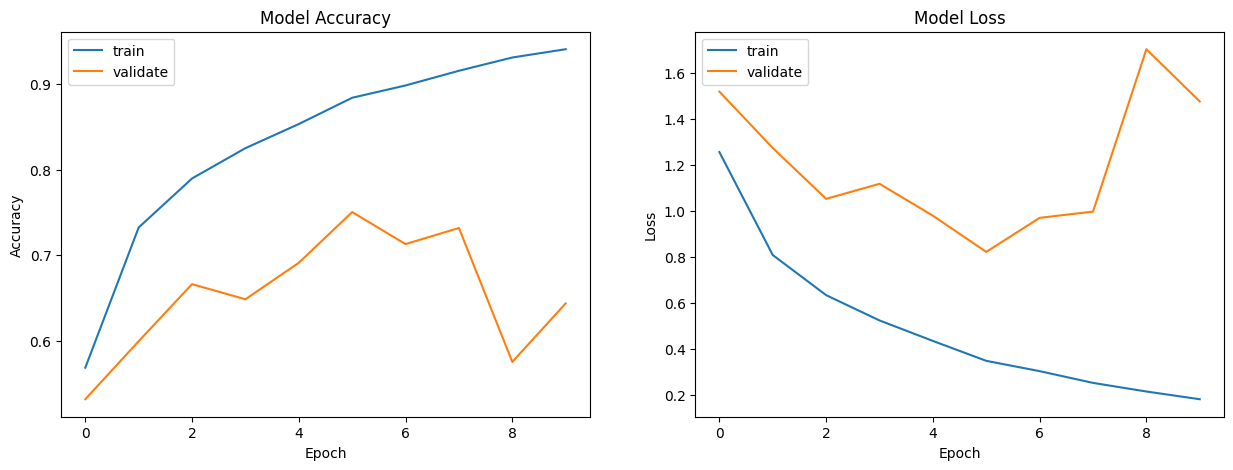

In [ ]:
plotmodelhistory(history_1)

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 5s 13ms/step - loss: 1.5184 - accuracy: 0.6375
Test loss: 1.5183993577957153
Test accuracy: 0.637499988079071
313/313 [==============================] - 4s 8ms/step


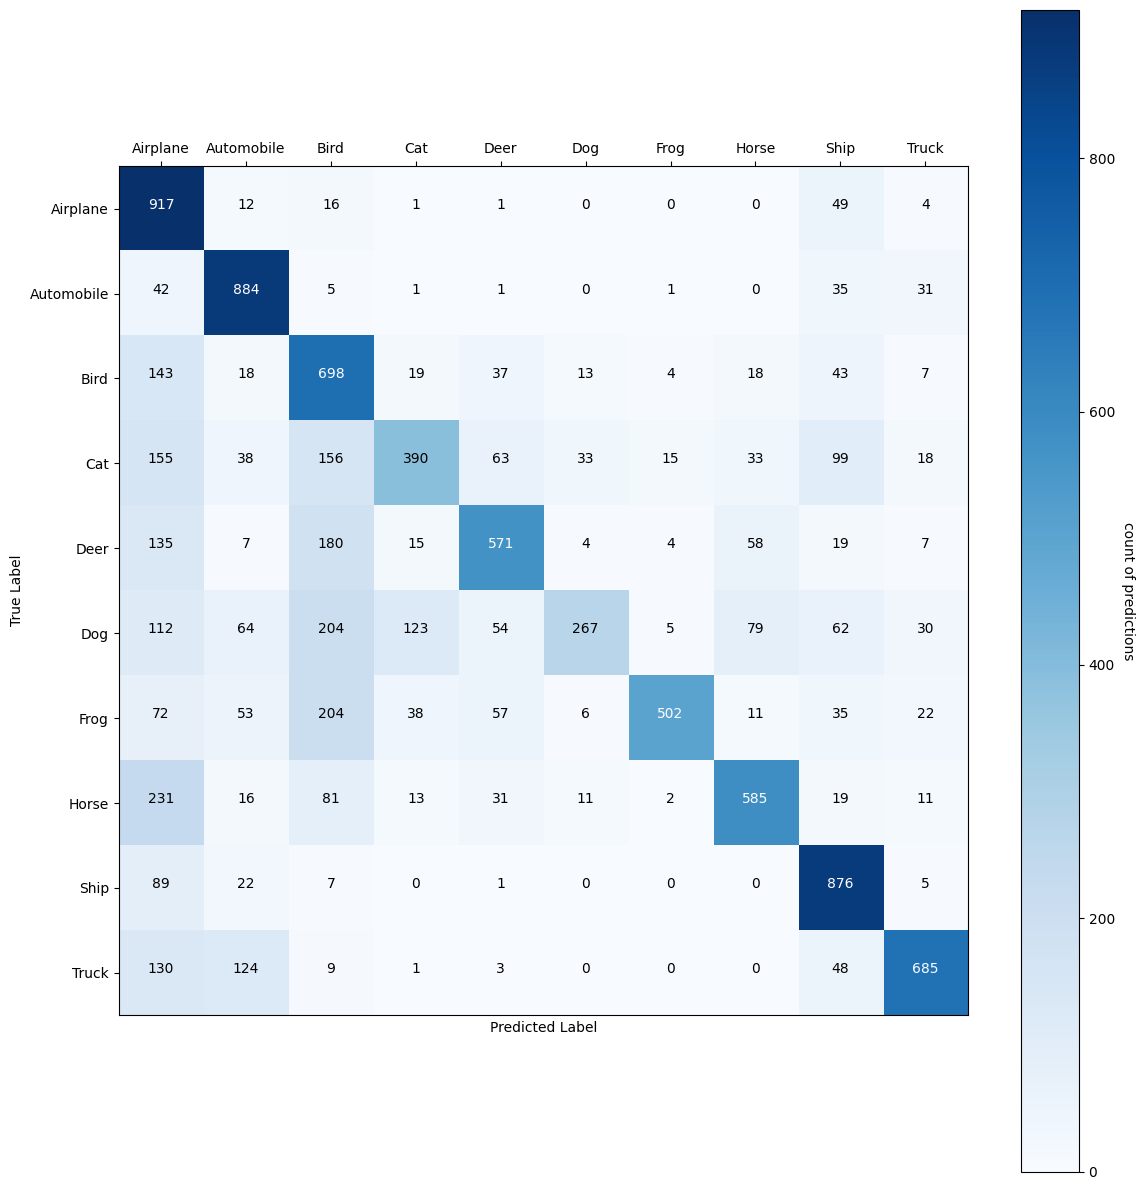

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

## **Part 2.3: Using DenseNet121 as a base model**



This time, for the following two "BASE MODELS", we will be making changes to the structure of our Fully Connected Layer by altering the following attributes:
*   Add Dropout layers
*   Use data augmentation
*   Change optimizer
*   Change other hyperparameters (learning rate, batch size, etc.)

**This BASE MODEL will have 121 layers in it's Network.**

In [ ]:
# Your code for Part 2.3.1 tasks here and in additional cells as needed for various models you examine

In [ ]:
# So, the typical order of layers in a CNN is:

# Input layer
# Convolutional layers
# Pooling layers
# Flatten layer (if needed)
# Fully connected layers
# Output layer


base_model_2 = DenseNet121(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_2=Sequential()
model_2.add(base_model_2)
model_2.add(Flatten())
model_2.add(Dense(4000,activation=('relu'),input_dim=512))
# It is called "Batch normalization" because it normalizes each individual input values that will be fed to the neuron of the designated layer.
# To be precise, Batch normalization normalizes the inputs to each neuron in a layer by subtracting the batch mean and dividing by the
# batch standard deviation. It operates on a mini-batch of samples at a time, hence the term "batch" in batch normalization.
model_2.add(BatchNormalization())
model_2.add(Dense(2000,activation=('relu')))
# Dropout randomly turn off random neuron in the given network. This is to check if there are any exploding or vanishing gradients which might or will be the
# potential cause for the over-fitting and probably under-fitting.
model_2.add(Dropout(0.5))
model_2.add(Dense(1000,activation=('relu')))
model_2.add(BatchNormalization())
model_2.add(Dense(500,activation=('relu')))
model_2.add(Dropout(0.5))
model_2.add(Dense(10,activation=('softmax')))

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
model_2.summary()
# In "Batch Normalization" step, in the given output shape - (None, 4000) 1st argument indicates the "SIZE of the BATCH" and the
# 2nd argument is the "NUMBER of NEURONS" in that given layer at that point of time.

# The 1st argument is "None" because the Batch Size is decided during the run-time

# Compared to the model_1, the model_2 is accepting "less number of channels" because of it's architecture. It is compatible enough to
# handle ony such less number of channels.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 4000)              4100000   
                                                                 
 batch_normalization_4 (Batc  (None, 4000)             16000     
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 2000)              8002000   
                                                                 
 dropout_6 (Dropout)         (None, 2000)              0         
                                                      

In [ ]:
# Since we have large dataset, and we are using GPU, we have ample resources, and we can continue using the same batch size of 128.
# But we can tweak the values of number of epochs and learning_rate

# One core concept is that, when we are dealing with larger datasets, we should divert our concentration more towards "MORE PROPAGATION"
# compared to the "RATE OF CONVERGENCE".

# IMPORTANT!! => If we were to make use of the "SLOWER CONVERGENCE" with more number of "SAMPLES" per "EPOCHS" by have more number of epochs,
#                update the weights very frequently(LEARNING RATE) -> Smaller the value of the learning rate, frequent the values of the
#                weights get updated.

# The above pattern of the values that we are considering, is the key concept for every "LARGE DATASETS".

# We are considering the below value for the batch_size(which is same as previously), epochs(has to be larger for larger datasets),
# learning rate(which is proportional to the batch size). If the batch size is "LARGE", there has to be "MORE" epochs. And if there
# are more epochs, there has to "GREATER" step size which is the update of each weight of neuron with respect to that designated
# learning rate value.

# Also this time we used Adam instead of Stochastic Gradient Descent as Adam is extended version of SGD with more adaptive feature which
# means changing the learning rate values at that very instant for optimization purposes. Adam has this incredible feature of updating
# the value of learning without following fixed values as other algorithms. This make it's more robust than other optimizing algorithms.

# Even though Adam optimizer assigns it's own learning rate values over the course of training of the model based on the performance of
# the model at that point of time, since we are dealing with larger dataset, and are witnessing performance issues, we are passing in
# our own learning rate value inorder to follow more disciplined pattern of the model exposing to a test set.


batch_size= 128
epochs=50
learn_rate=.0001

# sgd_2 = SGD(learning_rate=learn_rate, momentum=0.9,nesterov=False)
adam_2 = Adam(learning_rate=learn_rate)

In [ ]:
# Compile the model
model_2.compile(optimizer=adam_2,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

# Points to check to see if your model is doing good over the progress of the number of propagations or epochs

# 1) If the loss is close to "0" then that means that the model is learning the patterns of the data it is being fed with.
# 2) If the loss is close to "1" then that means that the model is not doing that good with taking the data in, and is not ready to get tested on the unseen data.
#    So, we always have to check the value that is associated with both the training and the validation loss. Based on that, we can tweak the hyperparameters such as
#    Epocs and the learning rate. In more higher level we might have to change the algorithm itself.
# 3) Now, the "VALIDATION ACCURACY" should always be either "EQUAL" or "GREATER" than the "TRAINING ACCURACY". Only then, can we tell that
#    our model is doing good with the unseen data

Epoch 1/50
274/274 [==============================] - 41s 89ms/step - loss: 1.9168 - accuracy: 0.3823 - val_loss: 1.0710 - val_accuracy: 0.6214
Epoch 2/50
274/274 [==============================] - 19s 68ms/step - loss: 1.0829 - accuracy: 0.6356 - val_loss: 0.8575 - val_accuracy: 0.7135
Epoch 3/50
274/274 [==============================] - 18s 66ms/step - loss: 0.7712 - accuracy: 0.7395 - val_loss: 0.7588 - val_accuracy: 0.7531
Epoch 4/50
274/274 [==============================] - 19s 68ms/step - loss: 0.5756 - accuracy: 0.8065 - val_loss: 0.6975 - val_accuracy: 0.7723
Epoch 5/50
274/274 [==============================] - 18s 65ms/step - loss: 0.4277 - accuracy: 0.8572 - val_loss: 0.7148 - val_accuracy: 0.7797
Epoch 6/50
274/274 [==============================] - 19s 70ms/step - loss: 0.3135 - accuracy: 0.8933 - val_loss: 0.7678 - val_accuracy: 0.7841
Epoch 7/50
274/274 [==============================] - 18s 67ms/step - loss: 0.2286 - accuracy: 0.9229 - val_loss: 0.8251 - val_accuracy:

In [ ]:
# As we can see that most of the validation loss has the value close to "0", and very little close to "1". This itself says that the
# model is learning information from the new unseen data rather than just memorizing the data. The "training loss" will be "0" 99% of time
# because we feed all the needed data to the model. But if we see the same behavior of the model with "validation loss", then we can
# strongly say that the model is doing good as it learned from the training set, and implementing the same on the uneseen data.

print(history_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


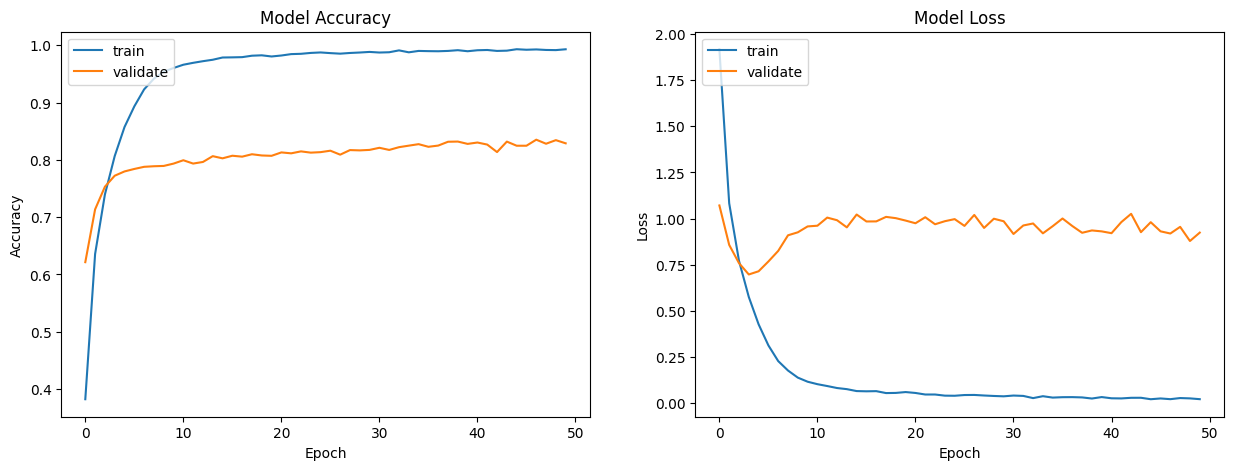

In [ ]:
plotmodelhistory(history_2)

In [ ]:
# Score trained model.
scores_2 = model_2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores_2[0])
print('Test accuracy:', scores_2[1])

# make prediction.
pred = model_2.predict(x_test)

313/313 [==============================] - 7s 18ms/step - loss: 0.9634 - accuracy: 0.8292
Test loss: 0.9634464979171753
Test accuracy: 0.829200029373169
313/313 [==============================] - 5s 12ms/step


## **Part 2.4: Using EfficientNetB0 as a base model**

**This BASE MODEL will have 215 layers in it's Network.**

In [ ]:
from keras.applications.efficientnet import EfficientNetB0

base_model_3 = EfficientNetB0(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_3=Sequential()
# We are rescaling, which transforming the image into a different shape just to give additional
# toughness to the model to get preapred with. So, it uses the concept of "Vector tranformation"
# model_3.add(preprocessing.Rescaling(1./255))
model_3.add(preprocessing.RandomFlip('horizontal'))
# model_3.add(preprocessing.RandomContrast(0.5))
model_3.add(base_model_3)
model_3.add(GlobalAveragePooling2D())
model_3.add(Flatten())
model_3.add(BatchNormalization())
model_3.add(Dense(4000,activation=('relu'),input_dim=512))
model_3.add(Dropout(0.50))
model_3.add(Dense(2000,activation=('relu')))
model_3.add(BatchNormalization())
model_3.add(Dense(1000,activation=('relu')))
model_3.add(Dropout(0.50))
model_3.add(Dense(500,activation=('relu')))
model_3.add(Dense(10,activation=('softmax')))

# First trial -
#   1) Excluded the Augmentation Methods, and avg pooling(because there might be a chance of diminishing the actual image).
#   2) batch_size= 128
#      epochs=10
#      learn_rate=.001
#      adam_3 = Adam(learning_rate=learn_rate)
#   Model was doing good - Accuracy - 80.6%

# Second trial -
#    We might want to have smaller learning rate because the longer we wait for the updates
#    the sonner we might experience vanishing gradients. This is because we might see many
#    changes with respect to contents of the image in the unseen data. So we need to make
#    sure that our model is up to date every now and then.
#    So, in this trial, we will be using smaller learning rate just like earlier - 0.0001, but this
#    time,
#    1) We will have Average pooling included but excluding augmentation.
#    2) same batch size = 128, epochs = 10 but small learning_rate = 0.0001
#    Model is doing good too. But slight lower accuracy compared to earlier - 73.6%

# Third trial -
#    This time increasing the epochs to 30, and keeping everything else same as the 2nd trial
#    learning rate = 0.0001, batch = 128, and still keeping the GlobalAveragePooling, and
#    excluding the Augmentation.
#    The model did not do that well as starting from 10th Epoch, the validation loss continued to be
#    over "1".
#    Accuracy this time - 78.4%

# Fourth trial -
#    Now let us keep everything else same
#    learning rate = 0.0001, batch size = 128, epochs = 30 but excluding average pooling and augmentation
#    77.4%

# Fifth trial -
#    All same as "Fourth trial", but this time "reduced" the "Dropout" from 0.5 to 0.25
#    Accuracy - 75.4%
# So we don't want to decrease the dropout, And also the average pooling.

# Continuation of trials, and the progress is recorded in the upcoming cell


16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
model_3.build(input_shape=(32,32,3))
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (32, 32, 3)               0         
                                                                 
 efficientnetb0 (Functional)  (None, 1, 1, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (1, 1280)                0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_1 (Flatten)         (1, 1280)                 0         
                                                                 
 batch_normalization (BatchN  (1, 1280)                5120      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (1, 4000)                

In [ ]:
batch_size= 350 # For "DEEPER NN", it is always best to take larger sample/batch size. That way we can get
# to faster convergence, and can make the model work more robust with the help of smaller "LEARNING RATE",
# and numbe of EPOCHS accordingly. SO, THE "PART" OF THE MAJOR ROLE OF INCRECREASE IN ACCURACY DEPENDS ON THE
# THE "BATCH SIZE" WE TAKE.

# 128, 150, 200, 250, No change(250),
# 300(Better)(80.6 but val_loss(not good(>=1) from epoch(>= 9)),
# No change(300)(removed avg pooling- horrible), 350(with avg pooling and augmentation - contrast - horrible)
# 300(with avg pooling and contrast - Not good), No Change(300)(with avg pooling, horizontal flip - Not good)
# No change(300)(only avg pooling, removed augmentation), 350(only avg, no augmentation)
epochs=10 #30, 10, 20, 20, 10, 20, 15(constant) - continue with this number, 10(final- continue with this)
learn_rate=.0001 # No change(0.0001), No change(0.0001), 0.001, 0.0001, 0.001, 0.0001(constant) - continue with this number
# 200, 20, 0.001 - Accuracy - 79.5 - Out of 10 Epochs, 7 were close to "0". So it was good values to use
# This time we are using just using the adam constructor alone to see how it perform as it assigns
# it's own learning rates during the training phase.
# adam_3 = Adam(learning_rate=learn_rate) Removed learning rate after 13th trial
adam_3 = Adam() # There was an Increment in accuracy after letting adam take it's own learning values

In [ ]:
# Compile the model
model_3.compile(optimizer=adam_3,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
100/100 [==============================] - 22s 118ms/step - loss: 1.4302 - accuracy: 0.5116 - val_loss: 1.1590 - val_accuracy: 0.6024
Epoch 2/10
100/100 [==============================] - 9s 89ms/step - loss: 0.7979 - accuracy: 0.7275 - val_loss: 0.7639 - val_accuracy: 0.7498
Epoch 3/10
100/100 [==============================] - 9s 89ms/step - loss: 0.6116 - accuracy: 0.7920 - val_loss: 0.6908 - val_accuracy: 0.7761
Epoch 4/10
100/100 [==============================] - 9s 89ms/step - loss: 0.5133 - accuracy: 0.8276 - val_loss: 0.6664 - val_accuracy: 0.7926
Epoch 5/10
100/100 [==============================] - 9s 88ms/step - loss: 0.4350 - accuracy: 0.8529 - val_loss: 0.6330 - val_accuracy: 0.7995
Epoch 6/10
100/100 [==============================] - 9s 88ms/step - loss: 0.3677 - accuracy: 0.8747 - val_loss: 0.6304 - val_accuracy: 0.8083
Epoch 7/10
100/100 [==============================] - 9s 88ms/step - loss: 0.3221 - accuracy: 0.8890 - val_loss: 0.6693 - val_accuracy: 0.81

In [ ]:
print(history_3.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


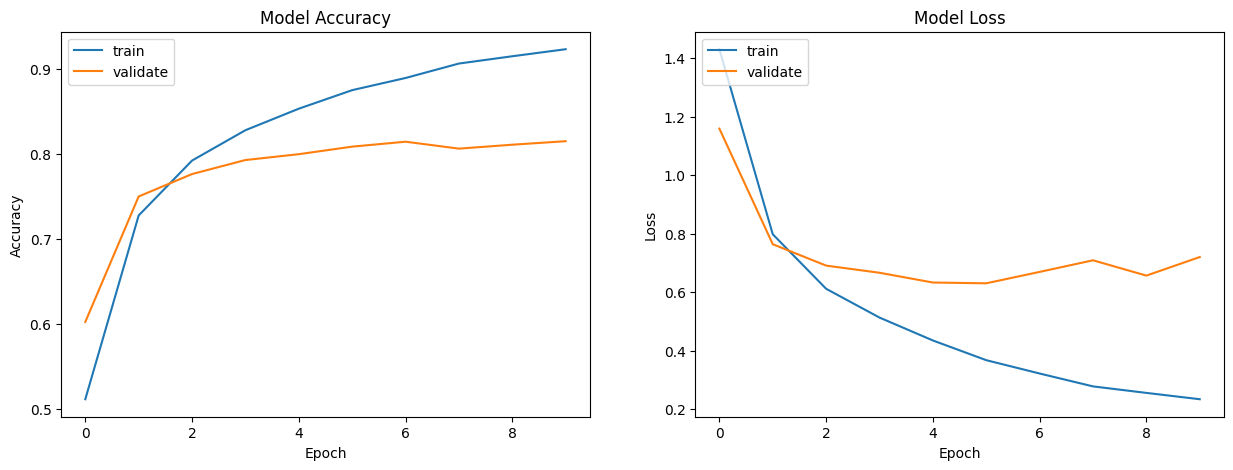

In [ ]:
plotmodelhistory(history_3)

In [ ]:
# Score trained model.
scores_3 = model_3.evaluate(x_test, y_test, verbose=1)
# The "evaluate" method will be a list of two values:
# 1) The loss of the model,
# 2) The accuracy of the model
print('Test loss:', scores_3[0])
print('Test accuracy:', scores_3[1])

# make prediction.
pred = model_3.predict(x_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.7550 - accuracy: 0.8104
Test loss: 0.7550051212310791
Test accuracy: 0.8104000091552734
313/313 [==============================] - 3s 9ms/step


## **Summary table of results**

| Method | Test accuracy | Remarks |
| --- | --- | --- |
| (Part 1) Baseline CNN designed from scratch | 0.752 | Bad at telling cats from dogs |
| (Part 2 - Model 1) Transfer learning using pre-trained CNN (ResNet50) | 0.769| Disappointly low, signs of overfitting |
| (Part 2 - Model 2) Transfer learning using pre-trained CNN (DenseNet121) | 0.829| No signs of over-fitting. The model did a good job with the prediction |
| (Part 2 - Model 3) Transfer learning using pre-trained CNN (EfficientNetB0 - 215 layers) | 0.806| No signs of over-fitting again. After lot of training and testing steps, the model was able to come close to good prediction level |


## **Conclusions**

1) Learnt how to build a collage of different entities in on single plot

2) Analyzed how the Convolution Neural Networks work, such as understanding "WHAT" is the purpose of multiple CNN sets, and "WHY" not only ONE. Understood that Each set starting from the "FIRST CNN", extracts the information of the fetched feature map, then the following sets until it gets to the "Fully Connected Layers", will keep analyzing and enhancing the model's performance based on the data that it receives from the previous CNN sets.

3) Understood that the "OVER POOLING" will result in causation of "EXPLODING GRADIENTS", and "UNDER POOLING" will result in causation of "VANISHING GRADIENT".

4) Captured the essence of the use case of BatchNormalization and Dropout. We use BatchNormalization to feed in the same scaled down values to te model to make it's performance more robust. Dropout on the other hand, will be used to randomly deactivate the activations to check if there is any sudden imporovement in the performance of the model by just turning off some neuron. This will help us in getting a clear picture as to "WHICH" is causing "WHAT".

5) Learned how to analyze the given dataset, and tell if it is balance or not. We can tell this by checking the distribution among multiple classes accross the dataset. If we see that all the given classes are equal measure in terms of distribution, we can say that the dataset is balanced.

6) Learnt how to pinpoint if the model is "OVER-FITTING" or not. Looking at the progress of the "validation_loss", we can clearly tell whether the model is over-fitting or not. The "ACCURACY" difference between training and testing will help us determine the "fitting" status of the model too.

7) Used couple of "BASE MODELS" for "TRANSFER LEARNING", to see how the model is performing throughout the training and testing phase with small tweaks within the same "FULLY CONNECTED NEURAL NETWORK" that we used for, and associated with the "THREE DIFFERENT BASE MODELS" we have considered - (ResNet50, DenseNet121 and EfficientNetB0-215 layer).

8) Succesfully managed to show the increment in the model's performance towards greater accuracy, as we are progressing with more "DEEP LAYERED BASE MODELS" by understanding the "ESSENCE" of "BATCH SIZE", "EPOCHS" and "LEARNING RATE" values.

9) Understood the relationship among each of the following attributes with
   others in the same below list:
   
    a) Sequence of Layer
   
    b) Paramteres to be considered in each Regulization techniques

    c) Optimizer and the parameters it takes in

    d) Loss Functions

    e) Batch Size

    f) Epochs

    g) Learning Rate